<a href="https://colab.research.google.com/github/tradertanmay/FinanceProjects/blob/master/Trading_Strategy_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import** **libraries** 

In [0]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [0]:
#Get Data
amazon =pdr.get_data_yahoo("amzn")

*Price* change for the last 5 days

In [0]:
amazon['5_Days_Close_Change']=amazon["Close"].shift(1) -amazon["Close"].shift(6)

*100* days standard deviation of price change

In [0]:
amazon['std_100day'] = amazon['5_Days_Close_Change'].rolling(window =100).std()


Average volume traded

In [0]:
amazon['5d_avg_vol'] = amazon['Volume'].shift(1).rolling(window=5).mean()

**Average** volume traded between last 5 to 10 days

In [0]:
amazon['past 5d_avg_vol'] = amazon['5d_avg_vol'].shift(5)

**Signal** column

In [0]:
amazon['signal']=0

Buy Signal

1)when the abosulte value of  5 day price change is greater than the 100 day std deviation






2) When  5 day avg volume is less thanthe avg volume between 5-10 days










3) When 5day price change is negative

In [0]:
amazon.loc[((amazon['5_Days_Close_Change'].abs() > amazon['std_100day'])
            & (amazon['5d_avg_vol']< amazon['past 5d_avg_vol']) 
               & (amazon['5_Days_Close_Change']<0)),'signal' ]=1

Sell Signal


Buy Signal

1)when the abosulte value of  5 day price change is greater than the 100 day std deviation






2) When  5 day avg volume is less thanthe avg volume between 5-10 days










3) When 5day price change is positive

In [0]:
amazon.loc[((amazon['5_Days_Close_Change'].abs() > amazon['std_100day']) 
     & (amazon['5d_avg_vol']< amazon['past 5d_avg_vol']) 
        & (amazon['5_Days_Close_Change']>0)),'signal' ]=-1

Now  we are only interested  in getting alternating buy and sell signal. So that 
we are only having at max one position in the market( either long, short or flat)



In [0]:
amazon1=amazon.drop(amazon[(amazon["signal"] ==0)].index)
amazon1 =amazon1.drop(amazon1[(amazon1["signal"]==amazon1["signal"].shift(1))].index)

Log Returns

In [0]:
amazon1["Return"]  =np.log(amazon1["Close"].shift(-1)/amazon1["Close"])

Strategy Returns

In [0]:
amazon1['Strategy_return']=amazon1['signal']*amazon1['Return']


Cumulative Returns

In [0]:
amazon1["cumulative_return"]=amazon1['Strategy_return'].cumsum()

Plot the cumulative returns

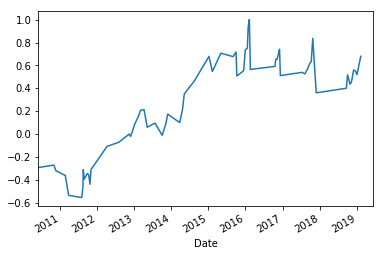

In [17]:
amazon1["cumulative_return"].plot()